In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df = pd.read_csv("/home/scai/msr/aiy227513/scratch/research/superSetAnalysis.csv")

In [3]:
df.head()

,abstract,authors,citationVelocity,citations,corpusId,doi,fieldsOfStudy,influentialCitationCount,isOpenAccess,isPublisherLicence,numCitebBy,numCiting,paperId,references,title,topics,venue,year
0,We present a novel generalized zero-shot algor...,"[{'authorId': '39373885', 'name': 'A. Banerjee...",0,"[{'arxivId': '2203.06935', 'authors': [{'autho...",221802616,10.1609/aaai.v36i1.19873,['Computer Science'],0,True,True,8,57,b836524d1d86e8612dff9fa5108000c6f78728fb,"[{'arxivId': '1911.08708', 'authors': [{'autho...",Learning Unseen Emotions from Gestures via Sem...,[],AAAI Conference on Artificial Intelligence,2020
1,Spiking Neural Networks (SNNs) have been attac...,"[{'authorId': '2152310230', 'name': 'Tong Bu',...",0,"[{'arxivId': '2304.01230', 'authors': [{'autho...",246485745,10.1609/aaai.v36i1.19874,['Computer Science'],3,True,True,16,50,f791cf3dbd0a1c97d340869988370fe086bfca03,"[{'arxivId': None, 'authors': [{'authorId': '4...",Optimized Potential Initialization for Low-lat...,[],AAAI Conference on Artificial Intelligence,2022
2,We revisit the planning problem in the blocks ...,"[{'authorId': '2025450238', 'name': 'Francesco...",0,[],245144247,10.1609/aaai.v36i1.19875,['Computer Science'],0,True,True,1,24,862396645566e310579f5cea6bdf4da995fedde8,"[{'arxivId': '2108.02189', 'authors': [{'autho...",Planning with Biological Neurons and Synapses,[],AAAI Conference on Artificial Intelligence,2021
3,"In humans, perceptual awareness facilitates th...","[{'authorId': '3038767', 'name': 'Alexander Or...",0,"[{'arxivId': '2212.04614', 'authors': [{'autho...",235899050,10.31219/osf.io/3nfcm,['Computer Science'],0,True,True,8,105,09897d26367a644811dc3be2109fe48778300d0a,"[{'arxivId': '2101.08937', 'authors': [{'autho...",Backprop-Free Reinforcement Learning with Acti...,[],AAAI Conference on Artificial Intelligence,2021
4,"The developmental approach, simulating a cogni...","[{'authorId': '73758722', 'name': 'Kwanyoung P...",0,[],250296453,10.1609/aaai.v36i1.19877,['Computer Science'],0,True,True,0,76,4bc58f0754829a24da39de6cdfda17a2bb3507fc,"[{'arxivId': None, 'authors': [{'authorId': '1...",VECA: A New Benchmark and Toolkit for General ...,[],AAAI Conference on Artificial Intelligence,2022


In [4]:
df.shape

(28365, 18)

In [5]:
distinct_values_count = df['venue'].nunique()
distinct_values_list = df['venue'].unique()

print(f"Number of distinct values: {distinct_values_count}")
print("Distinct values:")
for value in distinct_values_list:
    print(value)

Number of distinct values: 272
Distinct values:
AAAI Conference on Artificial Intelligence
International Symposium on Circuits and Systems
nan
ACM Conference on Economics and Computation
Description Logics
Computer Vision and Pattern Recognition
Symposium on Combinatorial Search
IN2WRITING
medRxiv
bioRxiv
AI Matters
2021 9th International Conference on Affective Computing and Intelligent Interaction Workshops and Demos (ACIIW)
2021 IEEE International Conference on Big Data (Big Data)
ICON
NeHuAI@ECAI
ArXiv
Adaptive Agents and Multi-Agent Systems
Comma
Asilomar Conference on Signals, Systems and Computers
IEEE International Conference on Computer Vision
International Conference on Artificial Intelligence and Statistics
arXiv.org
ComplexRec-ImpactRS@RecSys
IEEE/ACM International Conference on Human-Robot Interaction
IEEE Transactions on Image Processing
AAAI/ACM Conference on AI, Ethics, and Society
ICLP Workshops
Sistemi Evoluti per Basi di Dati
Conference on Uncertainty in Artificial I

In [6]:
# import pandas as pd

# # Load CSV1 into a DataFrame
# df1 = pd.read_csv('csv1.csv')

# Load CSV2 into a DataFrame
df2 = pd.read_csv('/home/scai/msr/aiy227513/research/data/links.csv')

# Create a dictionary mapping titles to acronyms from CSV2
#title_to_acronym = dict(zip(df2['Title'], df2['Acronym']))

# Function to get acronym based on venue



In [7]:
df2.head()

,code,year,title,link
0,AAAI,2022.0,Learning Unseen Emotions from Gestures via Sem...,https://www.semanticscholar.org/search?q=Learn...
1,AAAI,2022.0,Optimized Potential Initialization for Low-Lat...,https://www.semanticscholar.org/search?q=Optim...
2,AAAI,2022.0,Planning with Biological Neurons and Synapses.,https://www.semanticscholar.org/search?q=Plann...
3,AAAI,2022.0,Backprop-Free Reinforcement Learning with Acti...,https://www.semanticscholar.org/search?q=Backp...
4,AAAI,2022.0,VECA: A New Benchmark and Toolkit for General ...,https://www.semanticscholar.org/search?q=VECA%...


In [8]:
df['title'] = df['title'].str.strip(' .').str.lower()
df2['title'] = df2['title'].str.strip(' .').str.lower()

In [9]:
merged_df = df.merge(df2[['title', 'code']], on='title', how='left')

# Rename the 'Acronym' column to match your desired column name, e.g., 'Acronym'
merged_df.rename(columns={'code': 'Acronym'}, inplace=True)

In [10]:
merged_df.head(200)

,abstract,authors,citationVelocity,citations,corpusId,doi,fieldsOfStudy,influentialCitationCount,isOpenAccess,isPublisherLicence,numCitebBy,numCiting,paperId,references,title,topics,venue,year,Acronym
0,We present a novel generalized zero-shot algor...,"[{'authorId': '39373885', 'name': 'A. Banerjee...",0,"[{'arxivId': '2203.06935', 'authors': [{'autho...",221802616,10.1609/aaai.v36i1.19873,['Computer Science'],0,True,True,8,57,b836524d1d86e8612dff9fa5108000c6f78728fb,"[{'arxivId': '1911.08708', 'authors': [{'autho...",learning unseen emotions from gestures via sem...,[],AAAI Conference on Artificial Intelligence,2020,AAAI
1,Spiking Neural Networks (SNNs) have been attac...,"[{'authorId': '2152310230', 'name': 'Tong Bu',...",0,"[{'arxivId': '2304.01230', 'authors': [{'autho...",246485745,10.1609/aaai.v36i1.19874,['Computer Science'],3,True,True,16,50,f791cf3dbd0a1c97d340869988370fe086bfca03,"[{'arxivId': None, 'authors': [{'authorId': '4...",optimized potential initialization for low-lat...,[],AAAI Conference on Artificial Intelligence,2022,AAAI
2,We revisit the planning problem in the blocks ...,"[{'authorId': '2025450238', 'name': 'Francesco...",0,[],245144247,10.1609/aaai.v36i1.19875,['Computer Science'],0,True,True,1,24,862396645566e310579f5cea6bdf4da995fedde8,"[{'arxivId': '2108.02189', 'authors': [{'autho...",planning with biological neurons and synapses,[],AAAI Conference on Artificial Intelligence,2021,AAAI
3,"In humans, perceptual awareness facilitates th...","[{'authorId': '3038767', 'name': 'Alexander Or...",0,"[{'arxivId': '2212.04614', 'authors': [{'autho...",235899050,10.31219/osf.io/3nfcm,['Computer Science'],0,True,True,8,105,09897d26367a644811dc3be2109fe48778300d0a,"[{'arxivId': '2101.08937', 'authors': [{'autho...",backprop-free reinforcement learning with acti...,[],AAAI Conference on Artificial Intelligence,2021,AAAI
4,"The developmental approach, simulating a cogni...","[{'authorId': '73758722', 'name': 'Kwanyoung P...",0,[],250296453,10.1609/aaai.v36i1.19877,['Computer Science'],0,True,True,0,76,4bc58f0754829a24da39de6cdfda17a2bb3507fc,"[{'arxivId': None, 'authors': [{'authorId': '1...",veca: a new benchmark and toolkit for general ...,[],AAAI Conference on Artificial Intelligence,2022,AAAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Domain generalization typically requires data ...,"[{'authorId': '51306676', 'name': 'Quande Liu'...",0,"[{'arxivId': None, 'authors': [{'authorId': '2...",248238048,10.48550/arXiv.2206.14467,['Computer Science'],0,False,True,5,47,d754649f661eb29e0648ada875a35fd0985fbe4d,"[{'arxivId': '2109.09735', 'authors': [{'autho...",single-domain generalization in medical image ...,[],AAAI Conference on Artificial Intelligence,2022,AAAI
196,Detecting 3D lanes from the camera is a rising...,"[{'authorId': '2152936995', 'name': 'Ruijin Li...",0,"[{'arxivId': '2304.09807', 'authors': [{'autho...",245634663,10.1609/aaai.v36i2.20069,['Computer Science'],1,True,True,12,38,c6c9750d9c45a4ebc2c5071a6ca866597ab7ed08,"[{'arxivId': '2102.07037', 'authors': [{'autho...",learning to predict 3d lane shape and camera p...,[],AAAI Conference on Artificial Intelligence,2021,AAAI
197,We introduce the task of open-vocabulary visua...,"[{'authorId': '2152939611', 'name': 'Sheng Liu...",0,"[{'arxivId': '2204.05626', 'authors': [{'autho...",236956707,10.1609/aaai.v36i2.20070,['Computer Science'],0,True,True,1,55,27d36a848d0c34a17373e64bcade441f47753b45,"[{'arxivId': '2011.10678', 'authors': [{'autho...",ovis: open-vocabulary visual instance search v...,[],AAAI Conference on Artificial Intelligence,2021,AAAI
198,Although existing face anti-spoofing (FAS) met...,"[{'authorId': '32758259', 'name': 'Shice Liu',...",0,"[{'arxivId': '2301.02145', 'authors': [{'autho...",245634252,10.1609/aaai.v36i2.20071,['Computer Science'],0,True,True,8,65,dc4c28b752c0b3acf1a74027381d0c3b3b610db9,"[{'arxivId': '2111.06638', 'authors': [{'autho...",feature generation and hypothesis verificat

In [11]:
distinct_values_count = merged_df['Acronym'].nunique()
distinct_values_list = merged_df['Acronym'].unique()

print(f"Number of distinct values: {distinct_values_count}")
#unique_values = df[column_name].unique()
unique_values_dict = {}
for value in distinct_values_list:
    unique_values_dict[value] ={}


Number of distinct values: 17


In [12]:
unique_values_dict

{'AAAI': {},
 nan: {},
 'EC': {},
 'CVPR': {},
 'AAMAS': {},
 'ICCV': {},
 'IJCAI': {},
 'NeurIPS': {},
 'ICML': {},
 'KDD': {},
 'ICDM': {},
 'KR': {},
 'ICAPS': {},
 'SODA': {},
 'LICS': {},
 'ACL': {},
 'COLT': {},
 'SIGIR': {}}

In [13]:
acronym_counts = merged_df['Acronym'].value_counts()

# Print the count of each distinct acronym
print(acronym_counts)

AAAI       15643
AAMAS       6188
ACL         5974
IJCAI         49
EC             6
NeurIPS        4
ICML           4
CVPR           3
KR             3
LICS           2
ICAPS          2
COLT           1
KDD            1
SODA           1
ICDM           1
ICCV           1
SIGIR          1
Name: Acronym, dtype: int64


In [14]:
merged_df["citations"][0]

"[{'arxivId': '2203.06935', 'authors': [{'authorId': '2152549690', 'name': 'Yan Wang'}, {'authorId': '1518626713', 'name': 'Weizhen Song'}, {'authorId': '2112528845', 'name': 'Wei Tao'}, {'authorId': '1816294', 'name': 'A. Liotta'}, {'authorId': '2111298876', 'name': 'Da-Wei Yang'}, {'authorId': '1936493479', 'name': 'Xinlei Li'}, {'authorId': '101429720', 'name': 'Shuyong Gao'}, {'authorId': '2158860089', 'name': 'Yixuan Sun'}, {'authorId': '2390300', 'name': 'Weifeng Ge'}, {'authorId': '2155470292', 'name': 'Wei Zhang'}, {'authorId': '2155588822', 'name': 'Wenqiang Zhang'}], 'doi': '10.48550/arXiv.2203.06935', 'intent': ['background'], 'isInfluential': False, 'paperId': 'ccd6622a3e63acf856ea5931262019711ac90372', 'title': 'A Systematic Review on Affective Computing: Emotion Models, Databases, and Recent Advances', 'url': 'https://www.semanticscholar.org/paper/ccd6622a3e63acf856ea5931262019711ac90372', 'venue': 'Inf. Fusion', 'year': 2022}, {'arxivId': '2011.08690', 'authors': [{'auth

In [15]:
import ast
parsed_data = ast.literal_eval(merged_df['citations'][3])
# # Now you can work with parsed_data, which is a list of dictionaries
# for item in parsed_data:
for i in parsed_data:
    print(i['year'])
print(merged_df['year'][3])   

2022
2022
2022
2022
2022
2022
2020
2021
2021


In [16]:
anomoly={
    'source_title': [],
    'source_paperid': [],
    'source_year': [],
    'cited_title': [],
    'cited_paperid': [],
    'cited_year': []
}

In [17]:
# import pandas as pd

# # Create the original DataFrame
# data = {'unique_column': ['A', 'B', 'C', 'A', 'D', 'B', 'E'],
#         'another_column_1': [1, 2, 3, 4, 5, 6, 7],
#         'another_column_2': ['foo', 'bar', 'baz', 'qux', 'quux', 'corge', 'grault']}
# original_df = pd.DataFrame(data)

# Extract unique values from the specified column
unique_values = merged_df['venue'].unique()

# Create a new DataFrame with the unique values
new_df = pd.DataFrame({'venue': unique_values})

# Merge the new DataFrame with the original DataFrame based on the unique column
df_copy = pd.merge(new_df,merged_df[['venue', 'Acronym']], on='venue', how='left')

# Print the result
print(df_copy)


                                                   venue Acronym
0             AAAI Conference on Artificial Intelligence    AAAI
1             AAAI Conference on Artificial Intelligence    AAAI
2             AAAI Conference on Artificial Intelligence    AAAI
3             AAAI Conference on Artificial Intelligence    AAAI
4             AAAI Conference on Artificial Intelligence    AAAI
...                                                  ...     ...
28485                                           PLoS ONE     NaN
28486                        Annals of Internal Medicine     NaN
28487                 Australasian Computer Science Week     NaN
28488  IEEE Transactions on Audio, Speech, and Langua...     NaN
28489                   Ontology Learning and Population     NaN

[28490 rows x 2 columns]


In [19]:
for ind in range(len(merged_df)):
    parsed_data = ast.literal_eval(merged_df['citations'][ind])
   # print(len(parsed_data))
    for i in range(len(parsed_data)):
       if parsed_data[i]['year'] and merged_df['year'][ind] :
        if parsed_data[i]['year']<merged_df['year'][ind]:
#            if merged_df['title'][ind] and merged_df['paperId'][ind] and merged_df['year'][ind] and parsed_data[i]['title'] and parsed_data[i]['paperId']:
#             anomoly['source_title'].append(merged_df['title'][ind])
#             anomoly['source_paperid'].append(merged_df['paperId'][ind])
#             anomoly['source_year'].append(merged_df['year'][ind])
#             anomoly['cited_title'].append(parsed_data[i]['title'])
#             anomoly['cited_paperid'].append(parsed_data[i]['paperId'])
#             anomoly['cited_year'].append(parsed_data[i]['year'])
#             #print(parsed_data[i]['year'],merged_df['year'][ind],ind)
           continue
        c=str(parsed_data[i]['year']-merged_df['year'][ind])
        #print(c)
        if c not in unique_values_dict[merged_df['Acronym'][ind]]:
            unique_values_dict[merged_df['Acronym'][ind]][c]=[0,0]
        value_to_search = parsed_data[i]['venue']
        if not value_to_search:
            unique_values_dict[merged_df['Acronym'][ind]][c][1]=+1
            continue
        column_to_extract = 'Acronym'
        df = df_copy.copy()
        print(value_to_search)
        matching_row = df[df['venue'] == value_to_search]
        #print(matching_row)
        if not matching_row.empty:
            matched_column_value = matching_row.iloc[0][column_to_extract]
            
        else:
            matched_column_value='\0'
        #print(matched_column_value)    
        #matched_column_value = matching_row[column_to_extract]
        if matched_column_value==merged_df['Acronym'][ind]:unique_values_dict[merged_df['Acronym'][ind]][c][0]=+1
        else:unique_values_dict[merged_df['Acronym'][ind]][c][1]=+1

Atmosphere
Applied intelligence
Artificial Intelligence Review
2022 International Joint Conference on Neural Networks (IJCNN)
IEEE Access
Autonomous Agents and Multi-Agent Systems
AAAI
AAAI
Autonomous Agents and Multi-Agent Systems
Autonomous Agents and Multi-Agent Systems
Autonomous Agents and Multi-Agent Systems
ICAPS
Artif. Intell.
2016 5th Brazilian Conference on Intelligent Systems (BRACIS)
ICAPS
AAAI
Artif. Intell. Res.
Artif. Intell.
ICAPS
Expert Syst. J. Knowl. Eng.
JELIA
AAAI
ICAPS
IJCAI
A Concise Introduction to Models and Methods for Automated Planning
AAAI
ICAPS
J. Artif. Intell. Res.
ArXiv
Theory and Practice of Logic Programming
FLOPS
ArXiv
ArXiv
Theory and Practice of Logic Programming
PADL
ArXiv
ILP
ArXiv
AAAI
J. Mach. Learn. Res.
IJCAI
Machine Learning
Neurocomputing
ArXiv
J. Artif. Intell. Res.
Inf. Sci.
Machine Learning
ILP
Artif. Intell.
ArXiv
AAAI Workshops
Machine Learning
ArXiv
URANIA@AI*IA
ILP
CoCo@NIPS
Foundations of Biomedical Knowledge Representation
ITAT
Sem

In [27]:
unique_values_dict

{'IJCAI': {'2.0': [0, 1],
  '1.0': [0, 1],
  '9.0': [0, 1],
  '8.0': [0, 1],
  '6.0': [0, 1],
  '5.0': [0, 1],
  '0.0': [0, 1],
  '3.0': [0, 1],
  '7.0': [0, 1],
  '4.0': [0, 1],
  '10.0': [0, 1],
  '13.0': [0, 1],
  '15.0': [0, 1],
  '16.0': [0, 1],
  '14.0': [0, 1],
  '12.0': [0, 1],
  '11.0': [0, 1],
  '23.0': [0, 1],
  '21.0': [0, 1],
  '20.0': [0, 1],
  '18.0': [0, 1],
  '17.0': [0, 1],
  '24.0': [0, 1],
  '19.0': [0, 1],
  '27.0': [0, 1],
  '26.0': [0, 1],
  '25.0': [0, 1],
  '22.0': [0, 1]},
 'AAAI': {'10.0': [1, 1],
  '8.0': [1, 1],
  '7.0': [1, 1],
  '6.0': [1, 1],
  '5.0': [1, 1],
  '4.0': [1, 1],
  '3.0': [1, 1],
  '2.0': [1, 1],
  '1.0': [0, 1],
  '0.0': [0, 1],
  '16.0': [0, 1],
  '15.0': [0, 1],
  '14.0': [0, 1],
  '13.0': [0, 1],
  '12.0': [1, 1],
  '11.0': [0, 1],
  '9.0': [0, 1],
  '32.0': [0, 1],
  '31.0': [0, 1],
  '27.0': [0, 1],
  '25.0': [0, 1],
  '24.0': [0, 1],
  '22.0': [0, 1],
  '21.0': [0, 1],
  '20.0': [0, 1],
  '18.0': [0, 1],
  '17.0': [0, 1],
  '30.0': [0

In [21]:
anomoly_df = pd.DataFrame(anomoly)

# Save the DataFrame as a CSV file
anomoly_df.to_csv('anomoly_citation.csv', index=False)

In [ ]:
pwd

In [22]:
unique_values_dict

{'IJCAI': {'2.0': [0, 1],
  '1.0': [0, 1],
  '9.0': [0, 1],
  '8.0': [0, 1],
  '6.0': [0, 1],
  '5.0': [0, 1],
  '0.0': [0, 1],
  '3.0': [0, 1],
  '7.0': [0, 1],
  '4.0': [0, 1],
  '10.0': [0, 1],
  '13.0': [0, 1],
  '15.0': [0, 1],
  '16.0': [0, 1],
  '14.0': [0, 1],
  '12.0': [0, 1],
  '11.0': [0, 1],
  '23.0': [0, 1],
  '21.0': [0, 1],
  '20.0': [0, 1],
  '18.0': [0, 1],
  '17.0': [0, 1],
  '24.0': [0, 1],
  '19.0': [0, 1],
  '27.0': [0, 1],
  '26.0': [0, 1],
  '25.0': [0, 1],
  '22.0': [0, 1]},
 'AAAI': {'10.0': [1, 1],
  '8.0': [1, 1],
  '7.0': [1, 1],
  '6.0': [1, 1],
  '5.0': [1, 1],
  '4.0': [1, 1],
  '3.0': [1, 1],
  '2.0': [1, 1],
  '1.0': [0, 1],
  '0.0': [0, 1],
  '16.0': [0, 1],
  '15.0': [0, 1],
  '14.0': [0, 1],
  '13.0': [0, 1],
  '12.0': [1, 1],
  '11.0': [0, 1],
  '9.0': [0, 1],
  '32.0': [0, 1],
  '31.0': [0, 1],
  '27.0': [0, 1],
  '25.0': [0, 1],
  '24.0': [0, 1],
  '22.0': [0, 1],
  '21.0': [0, 1],
  '20.0': [0, 1],
  '18.0': [0, 1],
  '17.0': [0, 1],
  '30.0': [0

In [23]:
def sort_correlated_arrays(arr1, arr2):
    # Create a list of indices that will be used for sorting arr1
    arr1 = [int(item) for item in arr1]
    indices = list(range(len(arr1)))

    # Sort the indices based on the values in arr1
    indices.sort(key=lambda x: arr1[x])

    # Create new sorted arrays using the sorted indices
    sorted_arr1 = [arr1[i] for i in indices]
    sorted_arr2 = [arr2[i] for i in indices]

    return sorted_arr1, sorted_arr2

# # Example usage:
# arr1 = [3, 1, 2, 4]
# arr2 = ['C', 'A', 'B', 'D']




[[0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1]]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (28,) and arg 1 with shape (28, 2).

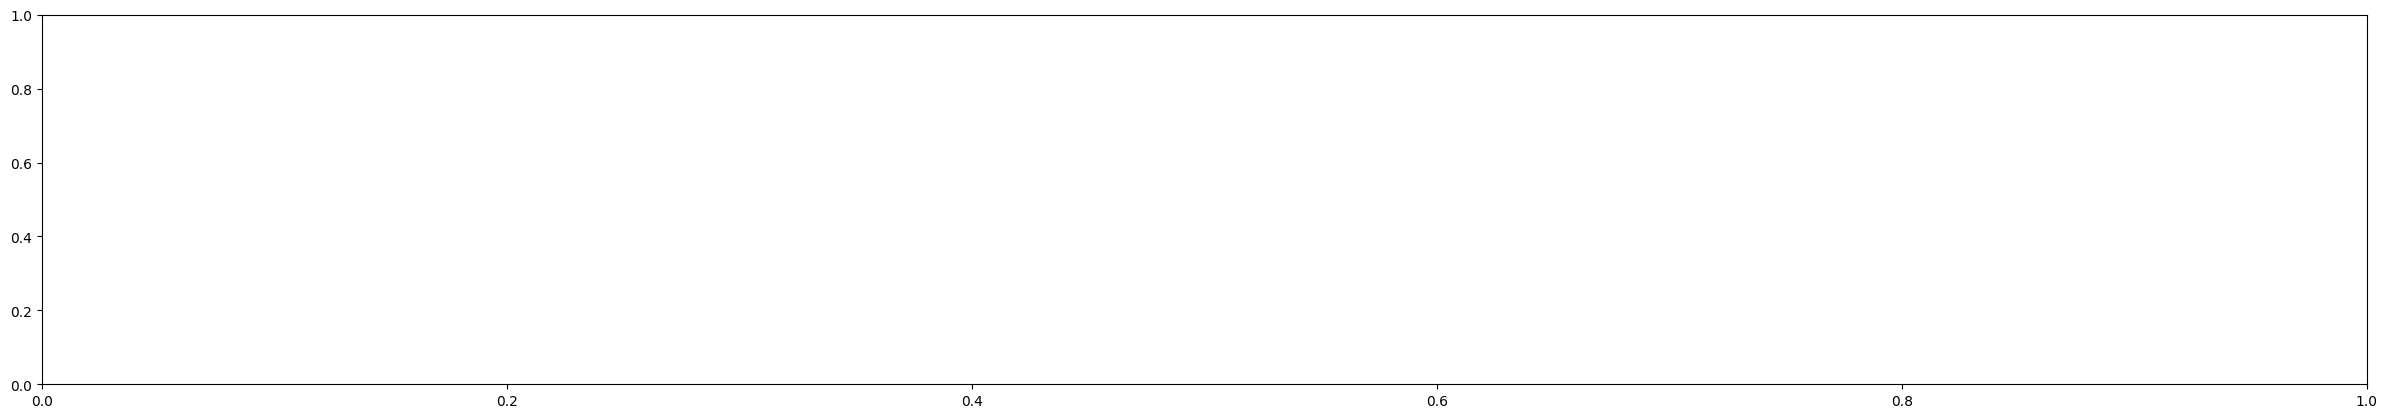

In [31]:

# assigning x and y coordinates 
# y = [0,1,2,3,4,5]
# x= [0,5,10,15,20,25]
  
# # depicting the visualization
# plt.bar(x, y, color='green') 
# plt.xlabel('x') 
# plt.ylabel('y') 
  
for i in unique_values_dict:
    x=[]
    y=[]
    for j in unique_values_dict[i]:
        float_value = float(j)
        int_value = int(float_value)
        x.append(int_value)
        y.append(unique_values_dict[i][j])
    x,y = sort_correlated_arrays(x,y) 
    print(y)
    plt.figure().set_figwidth(30)    
    plt.bar(x, y, color='green')    
    plt.title(i)
    plt.savefig(str(i)+'.png')

In [ ]:
pwd

In [ ]:
import plotly.graph_objs as go

# Define your data
x = [1, 2, 3, 4, 5]
y = [10, 20, 30, 40, 50]
z = [5, 15, 10, 8, 12]
text_labels = ['(1,10,5)', '(2,20,30)', '(3,30,10)', 'D', 'E']  # Replace with your custom text labels

# Create the 3D bar plot using Plotly scatter_3d
trace = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',  # Use 'markers' for bars
    marker=dict(size=10, color=z, colorscale='Viridis', opacity=0.8),
    text=text_labels,  # Set the text labels for each bar
    hoverinfo="text",  # Show text on hover
)

layout = go.Layout(
    title='3D Bar Plot Example',
    scene=dict(
        xaxis=dict(title='X-axis'),
        yaxis=dict(title='Y-axis'),
        zaxis=dict(title='Z-axis'),
    ),
)

fig = go.Figure(data=[trace], layout=layout)

# Show the plot (you can also save it as an HTML file or use it in a Jupyter Notebook)
fig.show()


In [25]:
# Sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': ['apple', 'banana', 'cherry', 'date', 'elderberry']
}

df = pd.DataFrame(data)

# Search for a specific value in a column
value_to_search = 'banana'
result = df[df['B'] == value_to_search]

# Select a particular column from the matching row
if not result.empty:
    matched_column_value = result['A'].values[0]
    print(matched_column_value)
else:
    print("No match found")


2


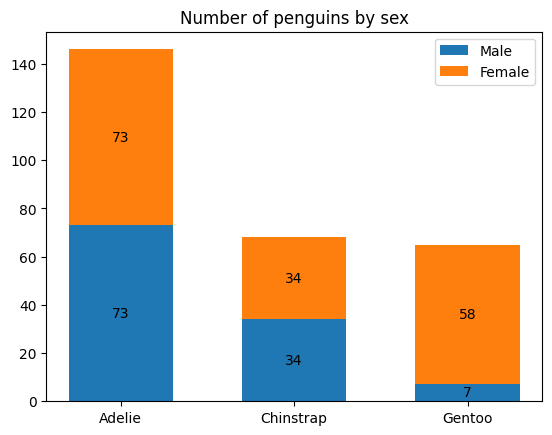

In [26]:
species = ('Adelie', 'Chinstrap', 'Gentoo')
sex_counts = {
    'Male': [73, 34, 7],
    'Female':[73, 34, 58],
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for sex, sex_count in sex_counts.items():
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type='center')

ax.set_title('Number of penguins by sex')
ax.legend()

plt.show()

In [ ]:
desired_substrings = ["AAAI", "Conf", "ntel"]

# Create a boolean mask for matching substrings in the 'venue' column
mask = df['venue'].str.contains(desired_substrings[0]) & \
       df['venue'].str.contains(desired_substrings[1]) & \
       df['venue'].str.contains(desired_substrings[2])

# Use the mask to filter the rows
result = merged_df[mask]

# Display the filtered DataFrame
print(result[['venue','year']])